In [53]:

import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud



In [54]:
data = pd.read_csv("credit_risk_dataset.csv")

In [55]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [56]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [57]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [58]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
data['person_emp_length']=imputer.fit_transform(data[['person_emp_length']])
data['loan_int_rate']=imputer.fit_transform(data[['loan_int_rate']])


In [59]:
person_emp_length_null=data['person_emp_length'].isnull().sum()
loan_int_rate_null =data['loan_int_rate'].isnull().sum()
print(f'Number of missing values in person_emp_length:{person_emp_length_null}\nNumber of missing values in loan_int_rate:{loan_int_rate_null}')

Number of missing values in person_emp_length:0
Number of missing values in loan_int_rate:0


In [60]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [61]:
data.reset_index(inplace = True)

In [62]:
data = data.drop(data[data['person_age'] > 70].index, axis=0)

In [63]:
data = data.drop(['index'], axis=1)

In [64]:
data.reset_index(inplace = True)

In [65]:
data = data.drop(data[data['person_emp_length'] > 42].index, axis=0)

In [66]:
data = data.drop(['index'], axis=1)

In [67]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32566.000000,3.256600e+04,32566.000000,32566.000000,32566.000000,32566.000000,32566.000000,32566.000000
mean,27.705859,6.588048e+04,4.780961,9588.656881,11.011863,0.218234,0.170212,5.799423
std,6.152800,5.253712e+04,3.972971,6320.600578,3.081817,0.413053,0.106760,4.043217
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [68]:
data.shape

(32566, 12)

In [69]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 80],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [70]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [71]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [72]:
data['loan_percent_income_group'] = pd.cut(data['loan_percent_income'],
                              bins=[0, 0.1, 0.15, 0.20, 0.25, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [73]:
data.isnull().sum()

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_default_on_file      0
cb_person_cred_hist_length     0
age_group                     15
income_group                   0
loan_amount_group              0
loan_percent_income_group      8
dtype: int64

In [74]:
data.dropna(axis=0, inplace=True)

In [75]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
age_group                     0
income_group                  0
loan_amount_group             0
loan_percent_income_group     0
dtype: int64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32543 entries, 1 to 32567
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32543 non-null  int64   
 1   person_income               32543 non-null  int64   
 2   person_home_ownership       32543 non-null  object  
 3   person_emp_length           32543 non-null  float64 
 4   loan_intent                 32543 non-null  object  
 5   loan_grade                  32543 non-null  object  
 6   loan_amnt                   32543 non-null  int64   
 7   loan_int_rate               32543 non-null  float64 
 8   loan_status                 32543 non-null  int64   
 9   loan_percent_income         32543 non-null  float64 
 10  cb_person_default_on_file   32543 non-null  object  
 11  cb_person_cred_hist_length  32543 non-null  int64   
 12  age_group                   32543 non-null  category
 13  income_group         

In [27]:
df = data


In [28]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_percent_income_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,low
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,high
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,high
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,high
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,high-middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium,low-middle
32564,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,low-middle
32565,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large,high
32566,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,low


==================== Label Encoder =====================

In [29]:
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [24]:
def label_encoder(dataframe):
    for col in dataframe.columns:
        if dataframe[col].nunique() < 3 and str(dataframe[col].dtypes) in ["category","object"] :
            le= preprocessing.LabelEncoder()
            dataframe[col] = le.fit_transform(dataframe[col].astype(str))
            return dataframe
df = label_encoder(df)


NameError: name 'df' is not defined

In [25]:
df.head()

NameError: name 'df' is not defined

====================== Hot Encoder ======================

In [28]:
def one_hot(dataframe):
    for col in dataframe.columns:
        if 2 < dataframe[col].nunique() < 8 and str(dataframe[col].dtypes) in ["category","object"]:
            dataframe=pd.get_dummies(dataframe,columns=[col])
    return dataframe
df = one_hot(df)

In [29]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,income_group_high,loan_amount_group_small,loan_amount_group_medium,loan_amount_group_large,loan_amount_group_very large,loan_percent_income_group_low,loan_percent_income_group_low-middle,loan_percent_income_group_middle,loan_percent_income_group_high-middle,loan_percent_income_group_high
1,21,9600,5.0,1000,11.14,0,0.10,N,2,False,...,False,True,False,False,False,True,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,N,3,True,...,False,False,True,False,False,False,False,False,False,True
3,23,65500,4.0,35000,15.23,1,0.53,N,2,False,...,False,False,False,False,True,False,False,False,False,True
4,24,54400,8.0,35000,14.27,1,0.55,Y,4,False,...,False,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,N,2,False,...,False,True,False,False,False,False,False,False,True,False


In [275]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_percent_income_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,low
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,high
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,high
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,high
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,high-middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium,low-middle
32564,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,low-middle
32565,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large,high
32566,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,low


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_percent_income_group
32563,36,1888,0,1,4,2,188,150,0,10,0,28,4,4,1,3
32564,33,3796,0,4,4,0,578,21,0,14,0,17,3,0,3,3
32565,44,2931,3,3,2,1,751,87,1,45,0,26,4,1,3,0
32566,35,3980,0,6,4,1,515,101,0,9,0,24,3,0,0,2
32567,45,1271,3,2,3,1,213,60,0,14,0,28,4,3,1,3


In [70]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_percent_income_group
1,0,25,2,6,1,1,7,93,0,9,0,0,0,2,2,2
2,4,25,0,1,3,2,176,142,1,56,0,1,0,2,1,0
3,2,2537,3,4,3,2,751,218,1,52,0,0,0,4,3,0
4,3,1978,3,9,3,2,751,187,1,54,1,2,0,4,3,0
5,0,28,2,2,5,0,59,15,1,24,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,36,1888,0,1,4,2,188,150,0,10,0,28,4,4,1,3
32564,33,3796,0,4,4,0,578,21,0,14,0,17,3,0,3,3
32565,44,2931,3,3,2,1,751,87,1,45,0,26,4,1,3,0
32566,35,3980,0,6,4,1,515,101,0,9,0,24,3,0,0,2


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32543 entries, 1 to 32567
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   person_age                             32543 non-null  int64
 1   person_income                          32543 non-null  int64
 2   person_emp_length                      32543 non-null  int64
 3   loan_amnt                              32543 non-null  int64
 4   loan_int_rate                          32543 non-null  int64
 5   loan_status                            32543 non-null  int64
 6   loan_percent_income                    32543 non-null  int64
 7   cb_person_default_on_file              32543 non-null  int64
 8   cb_person_cred_hist_length             32543 non-null  int64
 9   person_home_ownership_MORTGAGE         32543 non-null  int64
 10  person_home_ownership_OTHER            32543 non-null  int64
 11  person_home_ownership_OWN        

In [26]:
x = data[['age_group_20-25','age_group_26-35','age_group_36-45','age_group_46-55','age_group_56-65','income_group_low','income_group_low-middle','income_group_middle','income_group_high-middle','income_group_high','person_home_ownership_MORTGAGE','person_home_ownership_OTHER','person_home_ownership_RENT','loan_intent_DEBTCONSOLIDATION','loan_intent_EDUCATION','loan_intent_HOMEIMPROVEMENT','loan_intent_MEDICAL','loan_intent_PERSONAL','loan_intent_VENTURE','loan_amount_group_small','loan_amount_group_medium','loan_amount_group_large','loan_amount_group_very large','loan_percent_income_group_low','loan_percent_income_group_low-middle','loan_percent_income_group_middle','loan_percent_income_group_high-middle','loan_percent_income_group_high']].to_numpy()
x

KeyError: "None of [Index(['age_group_20-25', 'age_group_26-35', 'age_group_36-45',\n       'age_group_46-55', 'age_group_56-65', 'income_group_low',\n       'income_group_low-middle', 'income_group_middle',\n       'income_group_high-middle', 'income_group_high',\n       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',\n       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',\n       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',\n       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',\n       'loan_amount_group_small', 'loan_amount_group_medium',\n       'loan_amount_group_large', 'loan_amount_group_very large',\n       'loan_percent_income_group_low', 'loan_percent_income_group_low-middle',\n       'loan_percent_income_group_middle',\n       'loan_percent_income_group_high-middle',\n       'loan_percent_income_group_high'],\n      dtype='object')] are in the [columns]"

======================== CatBoost Encoder =====================

In [77]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_percent_income_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,low
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,high
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,high
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,high
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,high-middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32563,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium,low-middle
32564,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,low-middle
32565,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large,high
32566,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,low


In [78]:
x = data[['age_group','income_group','loan_amount_group','loan_percent_income_group','loan_intent','person_home_ownership','person_emp_length']].to_numpy()

In [79]:
x

array([['20-25', 'low', 'small', ..., 'EDUCATION', 'OWN', 5.0],
       ['20-25', 'low', 'medium', ..., 'MEDICAL', 'MORTGAGE', 1.0],
       ['20-25', 'middle', 'very large', ..., 'MEDICAL', 'RENT', 4.0],
       ...,
       ['56-65', 'high-middle', 'very large', ..., 'HOMEIMPROVEMENT',
        'RENT', 3.0],
       ['46-55', 'high', 'large', ..., 'PERSONAL', 'MORTGAGE', 5.0],
       ['56-65', 'low-middle', 'medium', ..., 'MEDICAL', 'RENT', 2.0]],
      dtype=object)

In [80]:
y = data[['loan_status']].to_numpy()
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [81]:
from category_encoders.cat_boost import CatBoostEncoder
catboost_encoder = CatBoostEncoder()


In [82]:
x_encoded = catboost_encoder.fit_transform(x,y)

In [83]:
x_encoded

,0,1,2,3,4,5,6
0,0.218327,0.218327,0.218327,0.218327,0.218327,0.218327,0.218327
1,0.109163,0.109163,0.218327,0.218327,0.218327,0.218327,0.218327
2,0.406109,0.218327,0.218327,0.609163,0.609163,0.218327,0.218327
3,0.554582,0.609163,0.609163,0.739442,0.739442,0.609163,0.218327
4,0.643665,0.406109,0.109163,0.218327,0.218327,0.109163,0.218327
...,...,...,...,...,...,...,...
32538,0.279799,0.175686,0.179962,0.128280,0.198951,0.125873,0.276861
32539,0.234302,0.095756,0.323353,0.128261,0.198915,0.125864,0.213214
32540,0.277232,0.109871,0.323287,0.529353,0.260954,0.315857,0.201048
32541,0.233761,0.095733,0.230101,0.117494,0.198879,0.125854,0.186152


In [84]:
y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [85]:
x

array([['20-25', 'low', 'small', ..., 'EDUCATION', 'OWN', 5.0],
       ['20-25', 'low', 'medium', ..., 'MEDICAL', 'MORTGAGE', 1.0],
       ['20-25', 'middle', 'very large', ..., 'MEDICAL', 'RENT', 4.0],
       ...,
       ['56-65', 'high-middle', 'very large', ..., 'HOMEIMPROVEMENT',
        'RENT', 3.0],
       ['46-55', 'high', 'large', ..., 'PERSONAL', 'MORTGAGE', 5.0],
       ['56-65', 'low-middle', 'medium', ..., 'MEDICAL', 'RENT', 2.0]],
      dtype=object)

In [86]:
y = data['loan_status']
y

1        0
2        1
3        1
4        1
5        1
        ..
32563    0
32564    0
32565    1
32566    0
32567    0
Name: loan_status, Length: 32543, dtype: int64

In [34]:
data['loan_status'].value_counts()

loan_status
0    25438
1     7105
Name: count, dtype: int64

In [35]:
y = data['loan_status']
y

1        0
2        1
3        1
4        1
5        1
        ..
32563    0
32564    0
32565    1
32566    0
32567    0
Name: loan_status, Length: 32543, dtype: int64

In [36]:
y = data.iloc[:,8].values
y

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [37]:
x.shape

(32543, 7)

In [38]:
y.shape

(32543,)

In [186]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_smt, y_smt = smt.fit_resample(x_encoded, y)



In [211]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(x_encoded, y)



In [212]:
X_cc.shape

(14210, 7)

In [213]:
y_cc.value_counts()

loan_status
0    7105
1    7105
Name: count, dtype: int64

In [230]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x_encoded, y)

In [231]:
X_ros.shape

(50876, 7)

In [233]:
y_ros.value_counts()

loan_status
0    25438
1    25438
Name: count, dtype: int64

 =============== below is the best technique for handliing imbalanced data =================

In [101]:
fig = px.histogram(data, x="loan_status", color="loan_status" ,text_auto= True , title="<b>"+' Imbalanced Data ' , color_discrete_sequence = ['#BA1F33','#3E92CC'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Loan Status',
yaxis_title='count',
)
fig.show()

In [87]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(x_encoded, y)

In [88]:
X_tl.shape

(30652, 7)

In [89]:
X_tl

,0,1,2,3,4,5,6
0,0.218327,0.218327,0.218327,0.218327,0.218327,0.218327,0.218327
1,0.109163,0.109163,0.218327,0.218327,0.218327,0.218327,0.218327
2,0.406109,0.218327,0.218327,0.609163,0.609163,0.218327,0.218327
3,0.554582,0.609163,0.609163,0.739442,0.739442,0.609163,0.218327
4,0.643665,0.406109,0.109163,0.218327,0.218327,0.109163,0.218327
...,...,...,...,...,...,...,...
30647,0.279799,0.175686,0.179962,0.128280,0.198951,0.125873,0.276861
30648,0.234302,0.095756,0.323353,0.128261,0.198915,0.125864,0.213214
30649,0.277232,0.109871,0.323287,0.529353,0.260954,0.315857,0.201048
30650,0.233761,0.095733,0.230101,0.117494,0.198879,0.125854,0.186152


In [35]:
y_tl

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [36]:
fig = px.histogram(y_tl, x="loan_status", color="loan_status" ,text_auto= True , title="<b>"+' After using the Balancing Technique ' , color_discrete_sequence = ['#BA1F33','#3E92CC'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Loan Status',
yaxis_title='count',
)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0] but received: loan_status

In [187]:
X_smt.shape

(48620, 7)

In [189]:
y_smt.value_counts()

loan_status
0    24310
1    24310
Name: count, dtype: int64

In [296]:
from imblearn.combine import SMOTETomek


In [297]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(x_encoded , y)

In [298]:
print(x_over.shape, y_over.shape)

(48620, 7) (48620,)


In [90]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_tl , y_tl , test_size = 0.25 , random_state = 42)
print(f'x_train shape:{x_train.shape}\nx_test shape:{x_test.shape}\ny_train shape:{y_train.shape}\ny_test shape:{y_test.shape}')

x_train shape:(22989, 7)
x_test shape:(7663, 7)
y_train shape:(22989,)
y_test shape:(7663,)


In [91]:
from sklearn.preprocessing import StandardScaler, Normalizer

st = StandardScaler()
x_train_scaled = st.fit_transform(x_train)
x_test_scaled = st.fit_transform(x_test)

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

In [93]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



In [94]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
cat_clf = CatBoostClassifier()

In [90]:
clf_list = [logisreg_clf, svm_clf, rf_clf, XGB_clf, cat_clf]
clf_name_list = ['Artificial Neural Network','Logistic Regression','SVC','Random Forest', 'XGBClassifier' ,'CatBoostClassifier']

for clf in clf_list:
    clf.fit(x_train,y_train)

Learning rate set to 0.039292
0:	learn: 0.6684227	total: 12.3ms	remaining: 12.2s
1:	learn: 0.6472838	total: 20.7ms	remaining: 10.3s
2:	learn: 0.6265312	total: 33.2ms	remaining: 11s
3:	learn: 0.6085465	total: 42.7ms	remaining: 10.6s
4:	learn: 0.5929882	total: 51.3ms	remaining: 10.2s
5:	learn: 0.5782789	total: 59.6ms	remaining: 9.88s
6:	learn: 0.5642973	total: 68ms	remaining: 9.64s
7:	learn: 0.5515019	total: 76.1ms	remaining: 9.43s
8:	learn: 0.5405371	total: 84.7ms	remaining: 9.33s
9:	learn: 0.5303562	total: 92.5ms	remaining: 9.15s
10:	learn: 0.5211397	total: 100ms	remaining: 9.03s
11:	learn: 0.5119551	total: 109ms	remaining: 8.96s
12:	learn: 0.5038961	total: 117ms	remaining: 8.91s
13:	learn: 0.4969175	total: 126ms	remaining: 8.88s
14:	learn: 0.4904430	total: 134ms	remaining: 8.82s
15:	learn: 0.4844909	total: 143ms	remaining: 8.8s
16:	learn: 0.4790467	total: 151ms	remaining: 8.75s
17:	learn: 0.4734071	total: 161ms	remaining: 8.77s
18:	learn: 0.4688980	total: 171ms	remaining: 8.83s
19:	le

182:	learn: 0.3784789	total: 1.42s	remaining: 6.34s
183:	learn: 0.3783563	total: 1.43s	remaining: 6.33s
184:	learn: 0.3781692	total: 1.43s	remaining: 6.32s
185:	learn: 0.3779441	total: 1.44s	remaining: 6.31s
186:	learn: 0.3778056	total: 1.45s	remaining: 6.29s
187:	learn: 0.3776174	total: 1.46s	remaining: 6.28s
188:	learn: 0.3774962	total: 1.46s	remaining: 6.27s
189:	learn: 0.3772636	total: 1.47s	remaining: 6.26s
190:	learn: 0.3771527	total: 1.48s	remaining: 6.25s
191:	learn: 0.3769907	total: 1.48s	remaining: 6.24s
192:	learn: 0.3768455	total: 1.49s	remaining: 6.23s
193:	learn: 0.3766451	total: 1.5s	remaining: 6.22s
194:	learn: 0.3764720	total: 1.5s	remaining: 6.21s
195:	learn: 0.3763321	total: 1.51s	remaining: 6.2s
196:	learn: 0.3762302	total: 1.52s	remaining: 6.19s
197:	learn: 0.3761251	total: 1.52s	remaining: 6.18s
198:	learn: 0.3759252	total: 1.53s	remaining: 6.17s
199:	learn: 0.3758120	total: 1.54s	remaining: 6.16s
200:	learn: 0.3756377	total: 1.54s	remaining: 6.14s
201:	learn: 0.3

348:	learn: 0.3562643	total: 2.63s	remaining: 4.91s
349:	learn: 0.3560995	total: 2.64s	remaining: 4.91s
350:	learn: 0.3559930	total: 2.65s	remaining: 4.9s
351:	learn: 0.3558710	total: 2.66s	remaining: 4.89s
352:	learn: 0.3555779	total: 2.67s	remaining: 4.88s
353:	learn: 0.3554211	total: 2.67s	remaining: 4.88s
354:	learn: 0.3552090	total: 2.68s	remaining: 4.87s
355:	learn: 0.3551173	total: 2.69s	remaining: 4.86s
356:	learn: 0.3550105	total: 2.7s	remaining: 4.86s
357:	learn: 0.3549324	total: 2.7s	remaining: 4.85s
358:	learn: 0.3548122	total: 2.71s	remaining: 4.84s
359:	learn: 0.3547391	total: 2.72s	remaining: 4.83s
360:	learn: 0.3545974	total: 2.73s	remaining: 4.83s
361:	learn: 0.3545276	total: 2.73s	remaining: 4.82s
362:	learn: 0.3544051	total: 2.74s	remaining: 4.81s
363:	learn: 0.3542407	total: 2.75s	remaining: 4.8s
364:	learn: 0.3541680	total: 2.76s	remaining: 4.8s
365:	learn: 0.3540706	total: 2.77s	remaining: 4.79s
366:	learn: 0.3540087	total: 2.77s	remaining: 4.78s
367:	learn: 0.353

532:	learn: 0.3362996	total: 4.09s	remaining: 3.58s
533:	learn: 0.3361544	total: 4.1s	remaining: 3.58s
534:	learn: 0.3360821	total: 4.11s	remaining: 3.57s
535:	learn: 0.3360032	total: 4.11s	remaining: 3.56s
536:	learn: 0.3359282	total: 4.12s	remaining: 3.55s
537:	learn: 0.3358743	total: 4.13s	remaining: 3.55s
538:	learn: 0.3357510	total: 4.14s	remaining: 3.54s
539:	learn: 0.3356453	total: 4.15s	remaining: 3.53s
540:	learn: 0.3355495	total: 4.15s	remaining: 3.52s
541:	learn: 0.3354782	total: 4.16s	remaining: 3.52s
542:	learn: 0.3353688	total: 4.17s	remaining: 3.51s
543:	learn: 0.3352538	total: 4.17s	remaining: 3.5s
544:	learn: 0.3351660	total: 4.18s	remaining: 3.49s
545:	learn: 0.3350949	total: 4.19s	remaining: 3.48s
546:	learn: 0.3350052	total: 4.2s	remaining: 3.48s
547:	learn: 0.3349069	total: 4.2s	remaining: 3.47s
548:	learn: 0.3348320	total: 4.21s	remaining: 3.46s
549:	learn: 0.3347424	total: 4.22s	remaining: 3.45s
550:	learn: 0.3345595	total: 4.22s	remaining: 3.44s
551:	learn: 0.33

696:	learn: 0.3222123	total: 5.31s	remaining: 2.31s
697:	learn: 0.3221346	total: 5.32s	remaining: 2.3s
698:	learn: 0.3220696	total: 5.33s	remaining: 2.29s
699:	learn: 0.3220085	total: 5.33s	remaining: 2.29s
700:	learn: 0.3219091	total: 5.34s	remaining: 2.28s
701:	learn: 0.3217553	total: 5.35s	remaining: 2.27s
702:	learn: 0.3217107	total: 5.36s	remaining: 2.26s
703:	learn: 0.3216243	total: 5.37s	remaining: 2.26s
704:	learn: 0.3215154	total: 5.37s	remaining: 2.25s
705:	learn: 0.3213148	total: 5.38s	remaining: 2.24s
706:	learn: 0.3212361	total: 5.39s	remaining: 2.23s
707:	learn: 0.3211773	total: 5.4s	remaining: 2.23s
708:	learn: 0.3210972	total: 5.41s	remaining: 2.22s
709:	learn: 0.3210443	total: 5.41s	remaining: 2.21s
710:	learn: 0.3209785	total: 5.42s	remaining: 2.2s
711:	learn: 0.3208934	total: 5.43s	remaining: 2.2s
712:	learn: 0.3208232	total: 5.44s	remaining: 2.19s
713:	learn: 0.3207470	total: 5.45s	remaining: 2.18s
714:	learn: 0.3205906	total: 5.45s	remaining: 2.17s
715:	learn: 0.32

868:	learn: 0.3088666	total: 6.75s	remaining: 1.02s
869:	learn: 0.3088125	total: 6.76s	remaining: 1.01s
870:	learn: 0.3086993	total: 6.78s	remaining: 1s
871:	learn: 0.3086339	total: 6.79s	remaining: 996ms
872:	learn: 0.3085815	total: 6.8s	remaining: 989ms
873:	learn: 0.3085063	total: 6.81s	remaining: 981ms
874:	learn: 0.3084326	total: 6.82s	remaining: 974ms
875:	learn: 0.3083631	total: 6.83s	remaining: 967ms
876:	learn: 0.3082984	total: 6.84s	remaining: 959ms
877:	learn: 0.3081744	total: 6.85s	remaining: 951ms
878:	learn: 0.3081197	total: 6.86s	remaining: 944ms
879:	learn: 0.3080444	total: 6.87s	remaining: 936ms
880:	learn: 0.3079801	total: 6.87s	remaining: 928ms
881:	learn: 0.3079214	total: 6.88s	remaining: 921ms
882:	learn: 0.3078562	total: 6.89s	remaining: 913ms
883:	learn: 0.3077769	total: 6.9s	remaining: 905ms
884:	learn: 0.3077025	total: 6.91s	remaining: 898ms
885:	learn: 0.3076416	total: 6.92s	remaining: 890ms
886:	learn: 0.3075651	total: 6.92s	remaining: 882ms
887:	learn: 0.307

In [91]:

    
train_acc_list = [train_acc]
test_acc_list = [test_acc]

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train, y_train)}')
    print(f'Test Score: {clf.score(x_test, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)   

Using model: Artificial Neural Network
Trainning Score: 0.822654312932272
Test Score: 0.8255252512070991
Acc Train: 0.822654312932272
Acc Test: 0.8255252512070991
                                                            
************************************************************
                                                            
Using model: Logistic Regression
Trainning Score: 0.8406629257470964
Test Score: 0.8423593892731306
Acc Train: 0.8406629257470964
Acc Test: 0.8423593892731306
                                                            
************************************************************
                                                            
Using model: SVC
Trainning Score: 1.0
Test Score: 0.8672843533864022
Acc Train: 1.0
Acc Test: 0.8672843533864022
                                                            
************************************************************
                                                            
Using model: Ran

test_size = 25

In [92]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Artificial Neural Network,0.857171,0.846133
Logistic Regression,0.822654,0.825525
SVC,0.840663,0.842359
Random Forest,1.000000,0.867284
XGBClassifier,0.905216,0.862717
CatBoostClassifier,0.880073,0.862325


==========================

In [77]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Artificial Neural Network,0.857171,0.846133
Logistic Regression,0.821753,0.824566
SVC,0.806058,0.809179
Random Forest,1.000000,0.862967
XGBClassifier,0.904344,0.857838
CatBoostClassifier,0.879488,0.862178


test_size = 30 

In [73]:
all_models = pd.DataFrame({'Train_Accuarcy': tr , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.822687,0.823890
SVC,0.841757,0.839890
Random Forest,1.000000,0.851288
XGBClassifier,0.908267,0.849863
CatBoostClassifier,0.879427,0.852712


In [94]:
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='tempo')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracy',
yaxis_title='Models Names',
)
fig.show()
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='tempo')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

In [83]:
x=np.array([0, 3, 0, 0, 3, 3,1])
x=x.reshape(1,-1)
result= cat_clf.predict(x)
if result==1:
  print("Sorry, You are Not eligible to get a loan.")
else:
  print("Congratulations, you are eligible to get a loan")

Sorry, You are Not eligible to get a loan.


In [84]:
x=np.array([2, 3, 1, 0, 3, 3,1])
x=x.reshape(1,-1)
result= cat_clf.predict(x)
if result==1:
  print("Sorry, You are Not eligible to get a loan.")
else:
  print("Congratulations, you are eligible to get a loan")

Congratulations, you are eligible to get a loan


In [71]:
from joblib import dump

In [72]:
dump(cat_clf, 'CatBoost_model.joblib')

['CatBoost_model.joblib']

In [80]:
import pickle

In [81]:
with open("catboost_model.pkl","wb") as file:
    pickle.dump(cat_clf, file)

 =============== using catencoder ===============

In [307]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.699918,0.702489
SVC,0.737916,0.735705
Random Forest,1.000000,0.835253
XGBClassifier,0.902843,0.771596
CatBoostClassifier,0.863534,0.783628


In [ ]:
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='tempo')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='tempo')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

====================== second test ===================

In [61]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)
print(f'x_train shape:{x_train.shape}\nx_test shape:{x_test.shape}\ny_train shape:{y_train.shape}\ny_test shape:{y_test.shape}')

x_train shape:(26034, 7)
x_test shape:(6509, 7)
y_train shape:(26034,)
y_test shape:(6509,)


In [286]:
clf_list = [logisreg_clf, svm_clf, rf_clf, XGB_clf, cat_clf]
clf_name_list = ['Logistic Regression','SVC','Random Forest', 'XGBClassifier' ,'CatBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

Learning rate set to 0.041435
0:	learn: 0.6676432	total: 10.6ms	remaining: 10.6s
1:	learn: 0.6450909	total: 21.9ms	remaining: 10.9s
2:	learn: 0.6247639	total: 32.7ms	remaining: 10.9s
3:	learn: 0.6051684	total: 44.6ms	remaining: 11.1s
4:	learn: 0.5868002	total: 56.7ms	remaining: 11.3s
5:	learn: 0.5691400	total: 68.6ms	remaining: 11.4s
6:	learn: 0.5551717	total: 79.5ms	remaining: 11.3s
7:	learn: 0.5413002	total: 91.7ms	remaining: 11.4s
8:	learn: 0.5284575	total: 103ms	remaining: 11.4s
9:	learn: 0.5166850	total: 115ms	remaining: 11.3s
10:	learn: 0.5071823	total: 126ms	remaining: 11.4s
11:	learn: 0.4979768	total: 139ms	remaining: 11.4s
12:	learn: 0.4901654	total: 150ms	remaining: 11.4s
13:	learn: 0.4837413	total: 161ms	remaining: 11.4s
14:	learn: 0.4771328	total: 173ms	remaining: 11.4s
15:	learn: 0.4711687	total: 185ms	remaining: 11.4s
16:	learn: 0.4653424	total: 197ms	remaining: 11.4s
17:	learn: 0.4600550	total: 210ms	remaining: 11.4s
18:	learn: 0.4562793	total: 221ms	remaining: 11.4s
19:

170:	learn: 0.3778729	total: 1.85s	remaining: 8.99s
171:	learn: 0.3778323	total: 1.87s	remaining: 8.99s
172:	learn: 0.3777529	total: 1.88s	remaining: 8.98s
173:	learn: 0.3776866	total: 1.89s	remaining: 8.97s
174:	learn: 0.3776036	total: 1.9s	remaining: 8.96s
175:	learn: 0.3775131	total: 1.91s	remaining: 8.95s
176:	learn: 0.3774593	total: 1.92s	remaining: 8.94s
177:	learn: 0.3773748	total: 1.93s	remaining: 8.93s
178:	learn: 0.3772918	total: 1.94s	remaining: 8.92s
179:	learn: 0.3772536	total: 1.96s	remaining: 8.91s
180:	learn: 0.3771472	total: 1.97s	remaining: 8.9s
181:	learn: 0.3770336	total: 1.98s	remaining: 8.88s
182:	learn: 0.3769602	total: 1.99s	remaining: 8.88s
183:	learn: 0.3768107	total: 2s	remaining: 8.87s
184:	learn: 0.3766769	total: 2.01s	remaining: 8.87s
185:	learn: 0.3766389	total: 2.02s	remaining: 8.87s
186:	learn: 0.3765139	total: 2.04s	remaining: 8.86s
187:	learn: 0.3764458	total: 2.05s	remaining: 8.85s
188:	learn: 0.3763927	total: 2.06s	remaining: 8.85s
189:	learn: 0.376

333:	learn: 0.3665871	total: 3.71s	remaining: 7.39s
334:	learn: 0.3665435	total: 3.72s	remaining: 7.38s
335:	learn: 0.3665090	total: 3.73s	remaining: 7.37s
336:	learn: 0.3664604	total: 3.74s	remaining: 7.36s
337:	learn: 0.3663895	total: 3.75s	remaining: 7.34s
338:	learn: 0.3663600	total: 3.76s	remaining: 7.33s
339:	learn: 0.3663017	total: 3.77s	remaining: 7.32s
340:	learn: 0.3662506	total: 3.78s	remaining: 7.31s
341:	learn: 0.3662115	total: 3.79s	remaining: 7.3s
342:	learn: 0.3661370	total: 3.8s	remaining: 7.28s
343:	learn: 0.3660713	total: 3.81s	remaining: 7.27s
344:	learn: 0.3660294	total: 3.82s	remaining: 7.26s
345:	learn: 0.3660104	total: 3.83s	remaining: 7.25s
346:	learn: 0.3659677	total: 3.85s	remaining: 7.24s
347:	learn: 0.3659244	total: 3.86s	remaining: 7.23s
348:	learn: 0.3658560	total: 3.87s	remaining: 7.22s
349:	learn: 0.3658030	total: 3.88s	remaining: 7.21s
350:	learn: 0.3657569	total: 3.89s	remaining: 7.2s
351:	learn: 0.3657208	total: 3.91s	remaining: 7.19s
352:	learn: 0.3

501:	learn: 0.3588085	total: 5.56s	remaining: 5.52s
502:	learn: 0.3587823	total: 5.58s	remaining: 5.51s
503:	learn: 0.3587491	total: 5.59s	remaining: 5.5s
504:	learn: 0.3587189	total: 5.6s	remaining: 5.49s
505:	learn: 0.3587182	total: 5.61s	remaining: 5.48s
506:	learn: 0.3586629	total: 5.62s	remaining: 5.47s
507:	learn: 0.3585979	total: 5.63s	remaining: 5.46s
508:	learn: 0.3585566	total: 5.64s	remaining: 5.44s
509:	learn: 0.3585023	total: 5.65s	remaining: 5.43s
510:	learn: 0.3584434	total: 5.67s	remaining: 5.42s
511:	learn: 0.3584089	total: 5.67s	remaining: 5.41s
512:	learn: 0.3583611	total: 5.69s	remaining: 5.4s
513:	learn: 0.3583605	total: 5.7s	remaining: 5.39s
514:	learn: 0.3583279	total: 5.71s	remaining: 5.37s
515:	learn: 0.3582769	total: 5.72s	remaining: 5.36s
516:	learn: 0.3582321	total: 5.73s	remaining: 5.35s
517:	learn: 0.3581608	total: 5.74s	remaining: 5.34s
518:	learn: 0.3580913	total: 5.75s	remaining: 5.33s
519:	learn: 0.3580468	total: 5.76s	remaining: 5.32s
520:	learn: 0.35

675:	learn: 0.3525904	total: 7.42s	remaining: 3.56s
676:	learn: 0.3525543	total: 7.43s	remaining: 3.54s
677:	learn: 0.3525167	total: 7.44s	remaining: 3.53s
678:	learn: 0.3524833	total: 7.45s	remaining: 3.52s
679:	learn: 0.3524755	total: 7.46s	remaining: 3.51s
680:	learn: 0.3524452	total: 7.47s	remaining: 3.5s
681:	learn: 0.3524087	total: 7.48s	remaining: 3.49s
682:	learn: 0.3523776	total: 7.49s	remaining: 3.48s
683:	learn: 0.3523534	total: 7.5s	remaining: 3.46s
684:	learn: 0.3523220	total: 7.51s	remaining: 3.45s
685:	learn: 0.3522734	total: 7.52s	remaining: 3.44s
686:	learn: 0.3522387	total: 7.53s	remaining: 3.43s
687:	learn: 0.3522159	total: 7.54s	remaining: 3.42s
688:	learn: 0.3522070	total: 7.55s	remaining: 3.41s
689:	learn: 0.3521807	total: 7.56s	remaining: 3.4s
690:	learn: 0.3521507	total: 7.57s	remaining: 3.39s
691:	learn: 0.3521503	total: 7.58s	remaining: 3.38s
692:	learn: 0.3521428	total: 7.59s	remaining: 3.36s
693:	learn: 0.3521356	total: 7.61s	remaining: 3.35s
694:	learn: 0.3

835:	learn: 0.3480366	total: 9.08s	remaining: 1.78s
836:	learn: 0.3480087	total: 9.09s	remaining: 1.77s
837:	learn: 0.3479686	total: 9.1s	remaining: 1.76s
838:	learn: 0.3479448	total: 9.11s	remaining: 1.75s
839:	learn: 0.3479162	total: 9.12s	remaining: 1.74s
840:	learn: 0.3478817	total: 9.13s	remaining: 1.73s
841:	learn: 0.3478517	total: 9.14s	remaining: 1.72s
842:	learn: 0.3478439	total: 9.15s	remaining: 1.7s
843:	learn: 0.3478358	total: 9.16s	remaining: 1.69s
844:	learn: 0.3477853	total: 9.17s	remaining: 1.68s
845:	learn: 0.3477621	total: 9.18s	remaining: 1.67s
846:	learn: 0.3477619	total: 9.19s	remaining: 1.66s
847:	learn: 0.3477399	total: 9.2s	remaining: 1.65s
848:	learn: 0.3477075	total: 9.21s	remaining: 1.64s
849:	learn: 0.3476832	total: 9.22s	remaining: 1.63s
850:	learn: 0.3476550	total: 9.23s	remaining: 1.62s
851:	learn: 0.3476114	total: 9.24s	remaining: 1.6s
852:	learn: 0.3475796	total: 9.25s	remaining: 1.59s
853:	learn: 0.3475617	total: 9.26s	remaining: 1.58s
854:	learn: 0.34

995:	learn: 0.3441234	total: 10.7s	remaining: 43.1ms
996:	learn: 0.3440881	total: 10.7s	remaining: 32.3ms
997:	learn: 0.3440761	total: 10.8s	remaining: 21.6ms
998:	learn: 0.3440467	total: 10.8s	remaining: 10.8ms
999:	learn: 0.3440420	total: 10.8s	remaining: 0us


In [287]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.8123223476991627
Test Score: 0.8150253495160547
Acc Train: 0.8123223476991627
Acc Test: 0.8150253495160547
                                                            
************************************************************
                                                            
Using model: SVC
Trainning Score: 0.8386340938772374
Test Score: 0.836380396374251
Acc Train: 0.8386340938772374
Acc Test: 0.836380396374251
                                                            
************************************************************
                                                            
Using model: Random Forest
Trainning Score: 0.9010140585388339
Test Score: 0.821785220463973
Acc Train: 0.9010140585388339
Acc Test: 0.821785220463973
                                                            
************************************************************
                                                            


In [288]:
all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.812322,0.815025
SVC,0.838634,0.836380
Random Forest,0.901014,0.821785
XGBClassifier,0.862833,0.846367
CatBoostClassifier,0.858608,0.849286


In [41]:
import shap

In [44]:
explainer = shap.Explainer(cat_clf)
shap_values = explainer.shap_values(x_test)

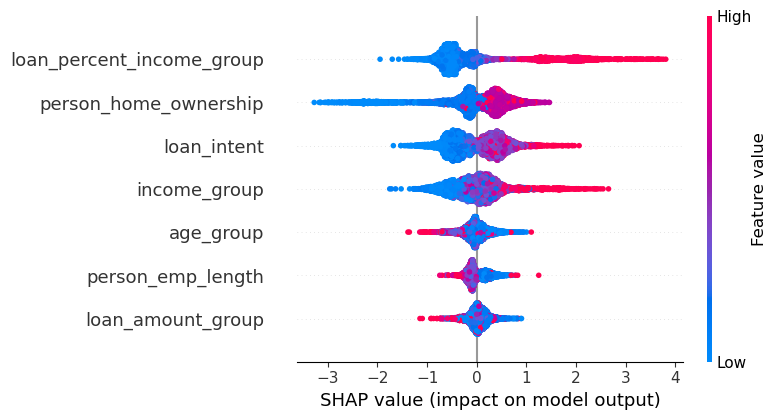

In [45]:
shap.summary_plot(shap_values, x_test)

In [51]:
explainer = shap.Explainer(XGB_clf)
shap_values = explainer.shap_values(x_test)

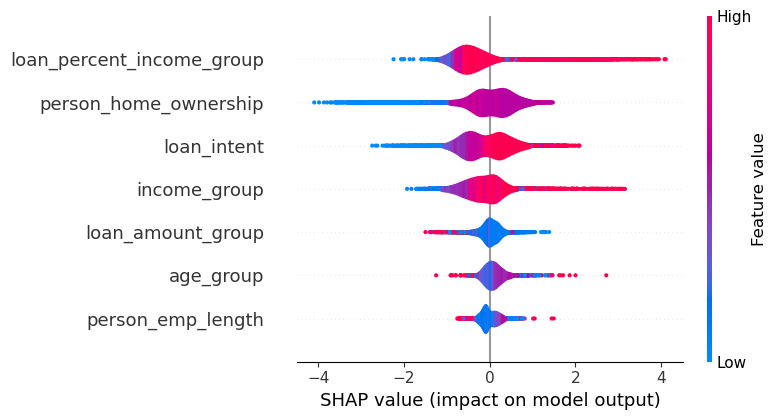

In [55]:
shap.summary_plot(shap_values, x_test, plot_type='violin')

In [57]:
shap.plots.force(shap_values[0], x_test)

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

====================================================================

====================== Artificial Neural Network ===========================

====================================================================

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [56]:
from tensorflow.keras.layers import Input
from sklearn import metrics

tf.keras.utils.set_random_seed(42)

In [51]:

#def create_model(units1=64, units2=32, dropout_rate=0.3, learning_rate=0.001):
    #model_four = Sequential()
   # model_four.add(Dense(units=units1, activation='relu', input_shape=(x_train.shape[1],)))
 #   model_four.add(Dropout(dropout_rate))
  #  model_four.add(Dense(units=units2, activation='relu'))
#    model_four.add(Dropout(dropout_rate))
 #   model_four.add(Dense(units=1, activation='sigmoid'))

#    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#    model_four.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#    return model_four
def create_model(units1=24, units2=12, units3=6, dropout_rate=0.2, learning_rate=0.001):
    inputs = Input(shape=(x_train.shape[1],))
    model_four = Dense(units=units1, activation='relu')(inputs)
    model_four = Dropout(dropout_rate)(model_four)
    
    model_four = Dense(units=units2, activation='relu')(model_four)
    model_four = Dropout(dropout_rate)(model_four)
    
    model_four = Dense(units=units3, activation='relu')(model_four)
    model_four = Dropout(dropout_rate)(model_four)
    
    outputs = Dense(units=1, activation='sigmoid')(model_four)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model_four = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model_four.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model_four
    
# Define the hyperparameter search
param_dist = {
    'units1': [96],
    'units2': [48],
    'units3': [48],
    'dropout_rate': [0.2],
    'learning_rate': [0.01, 0.001]
}



best_accuracy = 0
best_hyperparameters = None

for _ in range(10):  # You can adjust the number of iterations
    hyperparameters = {param: np.random.choice(values) for param, values in param_dist.items()}
    model_four = create_model(**hyperparameters)
    model_four.fit(x_train, y_train, epochs=50, batch_size=64, verbose=1)
    y_pred = (model_four.predict(x_test) > 0.5).astype('int32')
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Hyperparameters: {hyperparameters}, Accuracy: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hyperparameters = hyperparameters

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy)


Epoch 1/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7908 - loss: 0.4986
Epoch 2/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8213 - loss: 0.4552
Epoch 3/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8218 - loss: 0.4542
Epoch 4/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8237 - loss: 0.4518
Epoch 5/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8262 - loss: 0.4488
Epoch 6/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8235 - loss: 0.4476
Epoch 7/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8250 - loss: 0.4446
Epoch 8/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8255 - loss: 0.4450
Epoch 9/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8245 - loss: 0.4458
Epoch 10/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8242 - loss: 0.4438
Epoch 11/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8285 - loss: 0.4421
Epoch 12/50
380/380 ━━━━━━━━━━━━━━━━

380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8261 - loss: 0.4430
Epoch 32/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8271 - loss: 0.4417
Epoch 33/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.8266 - loss: 0.4428
Epoch 34/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - loss: 0.4389
Epoch 35/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8232 - loss: 0.4429
Epoch 36/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8256 - loss: 0.4422
Epoch 37/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8245 - loss: 0.4436
Epoch 38/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8283 - loss: 0.4385
Epoch 39/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8269 - loss: 0.4422
Epoch 40/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - loss: 0.4400
Epoch 41/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8286 - loss: 0.4380
Epoch 42/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 

380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8297 - loss: 0.4329
Epoch 11/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8317 - loss: 0.4298
Epoch 12/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8305 - loss: 0.4310
Epoch 13/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8309 - loss: 0.4289
Epoch 14/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.8324 - loss: 0.4264
Epoch 15/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8319 - loss: 0.4255
Epoch 16/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8329 - loss: 0.4253
Epoch 17/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8311 - loss: 0.4254
Epoch 18/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.4235  
Epoch 19/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8341 - loss: 0.4226
Epoch 20/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8342 - loss: 0.4209  
Epoch 21/50
380/380 ━━━━━━━━━━━━━━━━━

380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8234 - loss: 0.4472
Epoch 41/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.8277 - loss: 0.4425
Epoch 42/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8253 - loss: 0.4434
Epoch 43/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.4417
Epoch 44/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8271 - loss: 0.4403
Epoch 45/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8285 - loss: 0.4413
Epoch 46/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.4374
Epoch 47/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8296 - loss: 0.4388
Epoch 48/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8256 - loss: 0.4440
Epoch 49/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8293 - loss: 0.4389
Epoch 50/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8281 - loss: 0.4404
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
Hyperpar

380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8254 - loss: 0.4452
Epoch 5/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8258 - loss: 0.4412
Epoch 6/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8271 - loss: 0.4419
Epoch 7/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8278 - loss: 0.4383
Epoch 8/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.4353  
Epoch 9/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8283 - loss: 0.4342
Epoch 10/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8300 - loss: 0.4329
Epoch 11/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8300 - loss: 0.4304
Epoch 12/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8302 - loss: 0.4314
Epoch 13/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8288 - loss: 0.4303
Epoch 14/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8305 - loss: 0.4264
Epoch 15/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [62]:
# Use the best hyperparameters to create the final model

final_model = create_model(**best_hyperparameters)
ann_best_hyp = final_model.fit(x_train, y_train, epochs=500, batch_size=128, validation_data=(x_test, y_test), verbose=1)

NameError: name 'create_model' is not defined

In [70]:
model_three = Sequential()

# input layer
model_three.add(Dense(96,activation='relu'))
model_three.add(Dropout(0.2))

# hidden layer
model_three.add(Dense(48,activation='relu'))
model_three.add(Dropout(0.2))

# hidden layer
model_three.add(Dense(48,activation='relu'))
model_three.add(Dropout(0.2))

# output layer
model_three.add(Dense(1, activation='sigmoid'))

learning_rate = tf.Variable(0.001, trainable=False)


# compile model
model_three.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy']) 

In [71]:
model_three.fit(x = x_train, y = y_train, epochs = 500, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7393 - loss: 0.5667 - val_accuracy: 0.8119 - val_loss: 0.4586
Epoch 2/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4729 - val_accuracy: 0.8183 - val_loss: 0.4439
Epoch 3/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8103 - loss: 0.4629 - val_accuracy: 0.8221 - val_loss: 0.4390
Epoch 4/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8166 - loss: 0.4547 - val_accuracy: 0.8279 - val_loss: 0.4346
Epoch 5/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8204 - loss: 0.4498 - val_accuracy: 0.8282 - val_loss: 0.4331
Epoch 6/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8214 - loss: 0.4455 - val_accuracy: 0.8288 - val_loss: 0.4303
Epoch 7/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8226 - loss: 0.4414 - val_accuracy: 0.8317 - val_loss: 0.4269
Epoch 8/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8240 - loss: 0.4412 - val_accu

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8358 - loss: 0.4153 - val_accuracy: 0.8411 - val_loss: 0.4056
Epoch 52/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8361 - loss: 0.4159 - val_accuracy: 0.8411 - val_loss: 0.4063
Epoch 53/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.4168 - val_accuracy: 0.8418 - val_loss: 0.4050
Epoch 54/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8358 - loss: 0.4177 - val_accuracy: 0.8410 - val_loss: 0.4045
Epoch 55/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.4175 - val_accuracy: 0.8407 - val_loss: 0.4038
Epoch 56/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.4157 - val_accuracy: 0.8417 - val_loss: 0.4034
Epoch 57/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8360 - loss: 0.4160 - val_accuracy: 0.8409 - val_loss: 0.4037
Epoch 58/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.4135 - val_accuracy:

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.4100 - val_accuracy: 0.8434 - val_loss: 0.3982
Epoch 102/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.4099 - val_accuracy: 0.8435 - val_loss: 0.3984
Epoch 103/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8381 - loss: 0.4095 - val_accuracy: 0.8430 - val_loss: 0.3992
Epoch 104/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.4107 - val_accuracy: 0.8421 - val_loss: 0.3979
Epoch 105/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8374 - loss: 0.4097 - val_accuracy: 0.8430 - val_loss: 0.3977
Epoch 106/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.4081 - val_accuracy: 0.8432 - val_loss: 0.3987
Epoch 107/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.4080 - val_accuracy: 0.8430 - val_loss: 0.3980
Epoch 108/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.4104 - val_ac

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.4014 - val_accuracy: 0.8456 - val_loss: 0.3931
Epoch 200/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.4019 - val_accuracy: 0.8451 - val_loss: 0.3971
Epoch 201/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.4008 - val_accuracy: 0.8444 - val_loss: 0.3930
Epoch 202/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.4007 - val_accuracy: 0.8456 - val_loss: 0.3920
Epoch 203/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8399 - loss: 0.4009 - val_accuracy: 0.8432 - val_loss: 0.3946
Epoch 204/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8387 - loss: 0.4020 - val_accuracy: 0.8432 - val_loss: 0.3949
Epoch 205/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8409 - loss: 0.4024 - val_accuracy: 0.8447 - val_loss: 0.3915
Epoch 206/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8398 - loss: 0.3998 - val_ac

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8416 - loss: 0.3996 - val_accuracy: 0.8464 - val_loss: 0.3899
Epoch 298/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8421 - loss: 0.3956 - val_accuracy: 0.8459 - val_loss: 0.3908
Epoch 299/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3968 - val_accuracy: 0.8444 - val_loss: 0.3899
Epoch 300/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8439 - loss: 0.3952 - val_accuracy: 0.8435 - val_loss: 0.3915
Epoch 301/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.3965 - val_accuracy: 0.8461 - val_loss: 0.3933
Epoch 302/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.3993 - val_accuracy: 0.8422 - val_loss: 0.3925
Epoch 303/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8417 - loss: 0.3990 - val_accuracy: 0.8436 - val_loss: 0.3925
Epoch 304/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8402 - loss: 0.3962 - val_ac

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8414 - loss: 0.3965 - val_accuracy: 0.8478 - val_loss: 0.3904
Epoch 396/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8426 - loss: 0.3963 - val_accuracy: 0.8467 - val_loss: 0.3900
Epoch 397/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8439 - loss: 0.3941 - val_accuracy: 0.8456 - val_loss: 0.3893
Epoch 398/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8426 - loss: 0.3942 - val_accuracy: 0.8463 - val_loss: 0.3898
Epoch 399/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8453 - loss: 0.3946 - val_accuracy: 0.8457 - val_loss: 0.3893
Epoch 400/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8436 - loss: 0.3946 - val_accuracy: 0.8481 - val_loss: 0.3915
Epoch 401/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8431 - loss: 0.3958 - val_accuracy: 0.8435 - val_loss: 0.3914
Epoch 402/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8434 - loss: 0.3933 - val_ac

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8451 - loss: 0.3907 - val_accuracy: 0.8467 - val_loss: 0.3889
Epoch 494/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8442 - loss: 0.3948 - val_accuracy: 0.8472 - val_loss: 0.3884
Epoch 495/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3909 - val_accuracy: 0.8478 - val_loss: 0.3900
Epoch 496/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8428 - loss: 0.3925 - val_accuracy: 0.8455 - val_loss: 0.3903
Epoch 497/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8423 - loss: 0.3952 - val_accuracy: 0.8460 - val_loss: 0.3898
Epoch 498/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.3927 - val_accuracy: 0.8452 - val_loss: 0.3893
Epoch 499/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.3941 - val_accuracy: 0.8447 - val_loss: 0.3900
Epoch 500/500
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8416 - loss: 0.3952 - val_ac

In [72]:
losses_3 = pd.DataFrame(model_three.history.history)

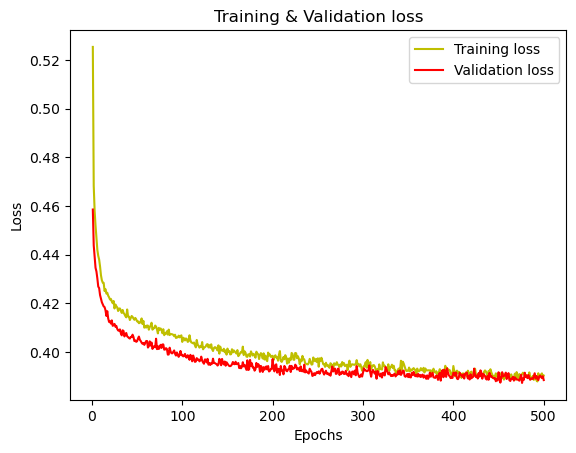

In [73]:
loss = model_three.history.history['loss']
val_loss = model_three.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training & Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

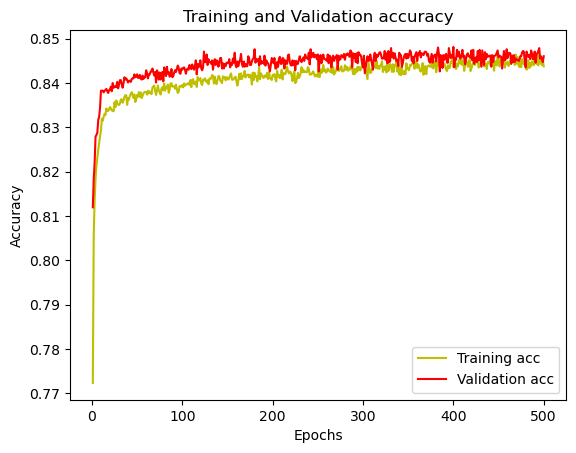

In [74]:
acc = model_three.history.history['accuracy']
val_acc = model_three.history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
metrics = estimator.evaluate(model_ann)
print(metrics['accuracy'])

NameError: name 'estimator' is not defined

In [80]:
history_train =model_three.evaluate(x_train, y_train)
print(history_train)

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.8470 - loss: 0.3765
[0.3745468556880951, 0.8488010168075562]


In [39]:
train_acc = 0.8571711 

In [81]:
history_test =model_three.evaluate(x_test, y_test)
print(history_test)

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8469 - loss: 0.3881
[0.38826048374176025, 0.8460021018981934]


In [40]:
test_acc = 0.846133 

In [78]:


#final_model.fit(x_train, y_train, epochs=150, batch_size=64, validation_data=(x_test, y_test), verbose=1)
model_ann = (model_three.predict(x_test) > 0.5).astype("int32")


print("The Accuracy of the Artificial Neural Network Model: ", round(metrics.accuracy_score(model_ann, y_test), 4))

#print(f"Prediction Time [s]: {execution_time:.3f}")

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step
The Accuracy of the Artificial Neural Network Model:  0.846


======================= Confusion Matrix =======================

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix

In [172]:
import time

=================== CatBoost ======================

In [ ]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
cat_clf = CatBoostClassifier()

In [181]:
cat_clf = CatBoostClassifier(verbose=0)

In [173]:
t0 = time.time()
cat_clf.fit(x_train, y_train)
print("Training time:", time.time()-t0)
y_pred_cat = cat_clf.predict(x_test)

Learning rate set to 0.039292
0:	learn: 0.6684227	total: 9.15ms	remaining: 9.14s
1:	learn: 0.6472838	total: 18.8ms	remaining: 9.4s
2:	learn: 0.6265312	total: 28.3ms	remaining: 9.41s
3:	learn: 0.6085465	total: 39.6ms	remaining: 9.86s
4:	learn: 0.5929882	total: 48.8ms	remaining: 9.71s
5:	learn: 0.5782789	total: 58.4ms	remaining: 9.67s
6:	learn: 0.5642973	total: 67.8ms	remaining: 9.61s
7:	learn: 0.5515019	total: 78.3ms	remaining: 9.7s
8:	learn: 0.5405371	total: 88.1ms	remaining: 9.7s
9:	learn: 0.5303562	total: 98.1ms	remaining: 9.71s
10:	learn: 0.5211397	total: 108ms	remaining: 9.68s
11:	learn: 0.5119551	total: 117ms	remaining: 9.6s
12:	learn: 0.5038961	total: 127ms	remaining: 9.61s
13:	learn: 0.4969175	total: 137ms	remaining: 9.64s
14:	learn: 0.4904430	total: 146ms	remaining: 9.6s
15:	learn: 0.4844909	total: 155ms	remaining: 9.51s
16:	learn: 0.4790467	total: 163ms	remaining: 9.43s
17:	learn: 0.4734071	total: 172ms	remaining: 9.38s
18:	learn: 0.4688980	total: 180ms	remaining: 9.31s
19:	le

161:	learn: 0.3814250	total: 1.46s	remaining: 7.57s
162:	learn: 0.3813080	total: 1.47s	remaining: 7.56s
163:	learn: 0.3811535	total: 1.48s	remaining: 7.55s
164:	learn: 0.3810216	total: 1.49s	remaining: 7.54s
165:	learn: 0.3809010	total: 1.5s	remaining: 7.53s
166:	learn: 0.3807892	total: 1.51s	remaining: 7.52s
167:	learn: 0.3805955	total: 1.52s	remaining: 7.51s
168:	learn: 0.3804876	total: 1.52s	remaining: 7.5s
169:	learn: 0.3803674	total: 1.53s	remaining: 7.49s
170:	learn: 0.3802725	total: 1.54s	remaining: 7.48s
171:	learn: 0.3801032	total: 1.55s	remaining: 7.46s
172:	learn: 0.3799585	total: 1.56s	remaining: 7.45s
173:	learn: 0.3798014	total: 1.57s	remaining: 7.44s
174:	learn: 0.3796928	total: 1.57s	remaining: 7.43s
175:	learn: 0.3796118	total: 1.58s	remaining: 7.42s
176:	learn: 0.3795399	total: 1.59s	remaining: 7.41s
177:	learn: 0.3794259	total: 1.6s	remaining: 7.39s
178:	learn: 0.3792554	total: 1.61s	remaining: 7.38s
179:	learn: 0.3790124	total: 1.62s	remaining: 7.37s
180:	learn: 0.3

330:	learn: 0.3585984	total: 2.91s	remaining: 5.88s
331:	learn: 0.3585066	total: 2.92s	remaining: 5.88s
332:	learn: 0.3583929	total: 2.93s	remaining: 5.87s
333:	learn: 0.3583134	total: 2.94s	remaining: 5.86s
334:	learn: 0.3581529	total: 2.95s	remaining: 5.85s
335:	learn: 0.3580347	total: 2.96s	remaining: 5.84s
336:	learn: 0.3579218	total: 2.96s	remaining: 5.83s
337:	learn: 0.3577674	total: 2.98s	remaining: 5.83s
338:	learn: 0.3576193	total: 2.98s	remaining: 5.82s
339:	learn: 0.3574964	total: 2.99s	remaining: 5.81s
340:	learn: 0.3571729	total: 3s	remaining: 5.8s
341:	learn: 0.3570679	total: 3.01s	remaining: 5.79s
342:	learn: 0.3569585	total: 3.02s	remaining: 5.78s
343:	learn: 0.3568556	total: 3.03s	remaining: 5.78s
344:	learn: 0.3567371	total: 3.04s	remaining: 5.77s
345:	learn: 0.3566436	total: 3.05s	remaining: 5.76s
346:	learn: 0.3565536	total: 3.06s	remaining: 5.75s
347:	learn: 0.3563324	total: 3.06s	remaining: 5.74s
348:	learn: 0.3562643	total: 3.07s	remaining: 5.74s
349:	learn: 0.35

489:	learn: 0.3404677	total: 4.36s	remaining: 4.54s
490:	learn: 0.3404118	total: 4.37s	remaining: 4.53s
491:	learn: 0.3403376	total: 4.38s	remaining: 4.52s
492:	learn: 0.3402334	total: 4.39s	remaining: 4.51s
493:	learn: 0.3401802	total: 4.4s	remaining: 4.51s
494:	learn: 0.3401043	total: 4.41s	remaining: 4.5s
495:	learn: 0.3400386	total: 4.42s	remaining: 4.49s
496:	learn: 0.3399385	total: 4.43s	remaining: 4.48s
497:	learn: 0.3398758	total: 4.44s	remaining: 4.47s
498:	learn: 0.3397615	total: 4.45s	remaining: 4.46s
499:	learn: 0.3395923	total: 4.45s	remaining: 4.45s
500:	learn: 0.3395126	total: 4.46s	remaining: 4.45s
501:	learn: 0.3393533	total: 4.47s	remaining: 4.43s
502:	learn: 0.3392645	total: 4.48s	remaining: 4.43s
503:	learn: 0.3391871	total: 4.49s	remaining: 4.42s
504:	learn: 0.3390482	total: 4.5s	remaining: 4.41s
505:	learn: 0.3388950	total: 4.51s	remaining: 4.4s
506:	learn: 0.3388080	total: 4.52s	remaining: 4.39s
507:	learn: 0.3386444	total: 4.53s	remaining: 4.38s
508:	learn: 0.33

651:	learn: 0.3257067	total: 5.8s	remaining: 3.09s
652:	learn: 0.3256398	total: 5.81s	remaining: 3.08s
653:	learn: 0.3255747	total: 5.82s	remaining: 3.08s
654:	learn: 0.3254826	total: 5.82s	remaining: 3.07s
655:	learn: 0.3254353	total: 5.83s	remaining: 3.06s
656:	learn: 0.3253560	total: 5.84s	remaining: 3.05s
657:	learn: 0.3252941	total: 5.85s	remaining: 3.04s
658:	learn: 0.3251894	total: 5.86s	remaining: 3.03s
659:	learn: 0.3251072	total: 5.87s	remaining: 3.02s
660:	learn: 0.3250529	total: 5.88s	remaining: 3.01s
661:	learn: 0.3249744	total: 5.88s	remaining: 3s
662:	learn: 0.3248962	total: 5.89s	remaining: 3s
663:	learn: 0.3248103	total: 5.9s	remaining: 2.98s
664:	learn: 0.3247159	total: 5.91s	remaining: 2.98s
665:	learn: 0.3246411	total: 5.92s	remaining: 2.97s
666:	learn: 0.3245438	total: 5.92s	remaining: 2.96s
667:	learn: 0.3244991	total: 5.93s	remaining: 2.95s
668:	learn: 0.3244429	total: 5.94s	remaining: 2.94s
669:	learn: 0.3243604	total: 5.95s	remaining: 2.93s
670:	learn: 0.324305

826:	learn: 0.3117430	total: 7.29s	remaining: 1.52s
827:	learn: 0.3116931	total: 7.3s	remaining: 1.52s
828:	learn: 0.3116458	total: 7.31s	remaining: 1.51s
829:	learn: 0.3115773	total: 7.32s	remaining: 1.5s
830:	learn: 0.3115148	total: 7.33s	remaining: 1.49s
831:	learn: 0.3114628	total: 7.33s	remaining: 1.48s
832:	learn: 0.3113695	total: 7.34s	remaining: 1.47s
833:	learn: 0.3113081	total: 7.35s	remaining: 1.46s
834:	learn: 0.3112244	total: 7.36s	remaining: 1.45s
835:	learn: 0.3111245	total: 7.37s	remaining: 1.45s
836:	learn: 0.3110204	total: 7.38s	remaining: 1.44s
837:	learn: 0.3109634	total: 7.38s	remaining: 1.43s
838:	learn: 0.3109074	total: 7.39s	remaining: 1.42s
839:	learn: 0.3107988	total: 7.4s	remaining: 1.41s
840:	learn: 0.3107324	total: 7.41s	remaining: 1.4s
841:	learn: 0.3106574	total: 7.42s	remaining: 1.39s
842:	learn: 0.3105701	total: 7.43s	remaining: 1.38s
843:	learn: 0.3105242	total: 7.43s	remaining: 1.37s
844:	learn: 0.3104728	total: 7.44s	remaining: 1.36s
845:	learn: 0.31

995:	learn: 0.3003346	total: 8.75s	remaining: 35.1ms
996:	learn: 0.3002727	total: 8.76s	remaining: 26.3ms
997:	learn: 0.3002199	total: 8.76s	remaining: 17.6ms
998:	learn: 0.3001744	total: 8.77s	remaining: 8.78ms
999:	learn: 0.3000979	total: 8.78s	remaining: 0us
Training time: 8.966022968292236


In [174]:
print(f"The Accuracy of the CatBoost Model: {round(metrics.accuracy_score(y_pred_cat, y_test), 4)}")


The Accuracy of the CatBoost Model: 0.8623


In [140]:
print("Evaluation Metrics for Catboost Model:\n",classification_report(y_test, y_pred_cat))

Evaluation Metrics for Catboost Model:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      5871
           1       0.84      0.49      0.62      1733

    accuracy                           0.86      7604
   macro avg       0.85      0.73      0.77      7604
weighted avg       0.86      0.86      0.85      7604



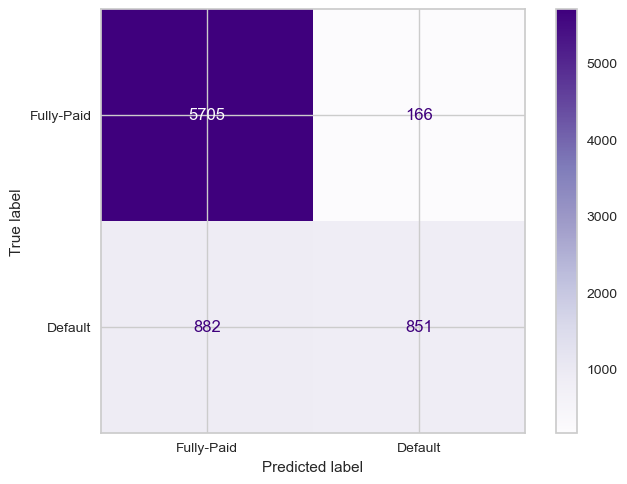

In [197]:
disp = ConfusionMatrixDisplay.from_estimator(
    cat_clf, x_test, y_test, 
    cmap='Purples', values_format='d', 
    display_labels=['Fully-Paid', 'Default']
)

==================== XGBoost ===============

In [175]:
t0 = time.time()

XGB_clf.fit(x_train, y_train)

print("Training time:", time.time()-t0)
y_pred_XGB_clf = XGB_clf.predict(x_test)

Training time: 0.5892829895019531


In [176]:
print(f"The Accuracy of the XGBoost Model: {round(metrics.accuracy_score(y_pred_XGB_clf, y_test), 4)}")

The Accuracy of the XGBoost Model: 0.8627


In [186]:
print("Evaluation Metrics for XGBoost Model:\n",classification_report(y_test, y_pred_XGB_clf))

Evaluation Metrics for XGBoost Model:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      5871
           1       0.81      0.49      0.61      1733

    accuracy                           0.86      7604
   macro avg       0.84      0.73      0.76      7604
weighted avg       0.85      0.86      0.84      7604



============================ Random forest ==========================

In [177]:
t0 = time.time()

rf_clf.fit(x_train, y_train)
print("Training time:", time.time()-t0)
y_pred_rf_clf = rf_clf.predict(x_test)

Training time: 4.433594465255737


In [178]:
print(f"The Accuracy of the Random Forest Model: {round(metrics.accuracy_score(y_pred_rf_clf, y_test), 4)}")

The Accuracy of the Random Forest Model: 0.8672


In [187]:
print("Evaluation Metrics for Random Forest Model:\n",classification_report(y_test, y_pred_rf_clf))

Evaluation Metrics for Random Forest Model:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      5871
           1       0.83      0.51      0.63      1733

    accuracy                           0.86      7604
   macro avg       0.85      0.74      0.77      7604
weighted avg       0.86      0.86      0.85      7604



======================= SVC ====================

In [179]:
t0 = time.time()
svm_clf.fit(x_train, y_train)
print("Training time:", time.time()-t0)
y_pred_svm_clf = svm_clf.predict(x_test)

Training time: 10.47374415397644


In [180]:
print(f"The Accuracy of the SVC Model: {round(metrics.accuracy_score(y_pred_svm_clf, y_test), 4)}")

The Accuracy of the SVC Model: 0.8424


In [181]:
print("Evaluation Metrics for SVC Model:\n",classification_report(y_test, y_pred_svm_clf))

Evaluation Metrics for SVC Model:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      5911
           1       0.81      0.41      0.54      1752

    accuracy                           0.84      7663
   macro avg       0.83      0.69      0.72      7663
weighted avg       0.84      0.84      0.82      7663



============================ Logistic Regression ========================

In [182]:
t0 = time.time()
logisreg_clf.fit(x_train, y_train)
print("Training time:", time.time()-t0)
y_pred_svm_logisreg_clf = logisreg_clf.predict(x_test)

Training time: 0.022427797317504883


In [183]:
print(f"The Accuracy of the Logistic Regression  Model: {round(metrics.accuracy_score(y_pred_svm_logisreg_clf, y_test), 4)}")

The Accuracy of the Logistic Regression  Model: 0.8255


In [184]:
print("Evaluation Metrics for Logistic Regression  Model:\n",classification_report(y_test, y_pred_svm_logisreg_clf))

Evaluation Metrics for Logistic Regression  Model:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      5911
           1       0.75      0.35      0.48      1752

    accuracy                           0.83      7663
   macro avg       0.79      0.66      0.69      7663
weighted avg       0.82      0.83      0.80      7663



============================ Artificial Neural Network  ============================

In [159]:
model_ann = (model_three.predict(x_test) > 0.5).astype("int32")


238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step


In [183]:
t0 = time.time()

model_three.fit(x_train, y_train)
print("Training time:", time.time()-t0)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.8393 - loss: 0.3992
Training time: 0.6600499153137207


In [160]:
print("The Accuracy of the Artificial Neural Network Model: ", round(metrics.accuracy_score(model_ann, y_test), 4))


The Accuracy of the Artificial Neural Network Model:  0.846


In [193]:
print("Evaluation Metrics for Artificial Neural Network  Model:\n",classification_report(y_test, model_ann))

Evaluation Metrics for Artificial Neural Network  Model:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      5871
           1       0.79      0.44      0.57      1733

    accuracy                           0.85      7604
   macro avg       0.82      0.70      0.74      7604
weighted avg       0.84      0.85      0.83      7604



==========================!!!!!!!--- End ---!!!!!!!============================= 

In [209]:
from sklearn.metrics import roc_curve, auc

In [ ]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
cat_clf = CatBoostClassifier()

In [205]:
auc_log = logisreg_clf.predict_proba(x_test)[:, 1]
auc_rf = rf_clf.predict_proba(x_test)[:,1]

auc_xgboost = XGB_clf.predict_proba(x_test)[:,1]
auc_cat = cat_clf.predict_proba(x_test)[:,1]
#auc_ann = model_ann.predict_proba(x_test)[:,1]

In [203]:
y_pred_proba = model_three.predict(x_test)
auc_ann = y_pred_proba[:, 0]

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step


In [207]:
svm_clf = SVC(probability=True)
svm_clf.fit(x_train, y_train)
auc_svc = svm_clf.predict_proba(x_test)[:, 1]

In [211]:
test_df = pd.DataFrame(
    {'True': y_test,'XGBoost': auc_xgboost,'CatBoost': auc_cat,'ANN':auc_ann, 'SVC': auc_svc, 'Logistic': auc_log, 'RandomForest': auc_rf})

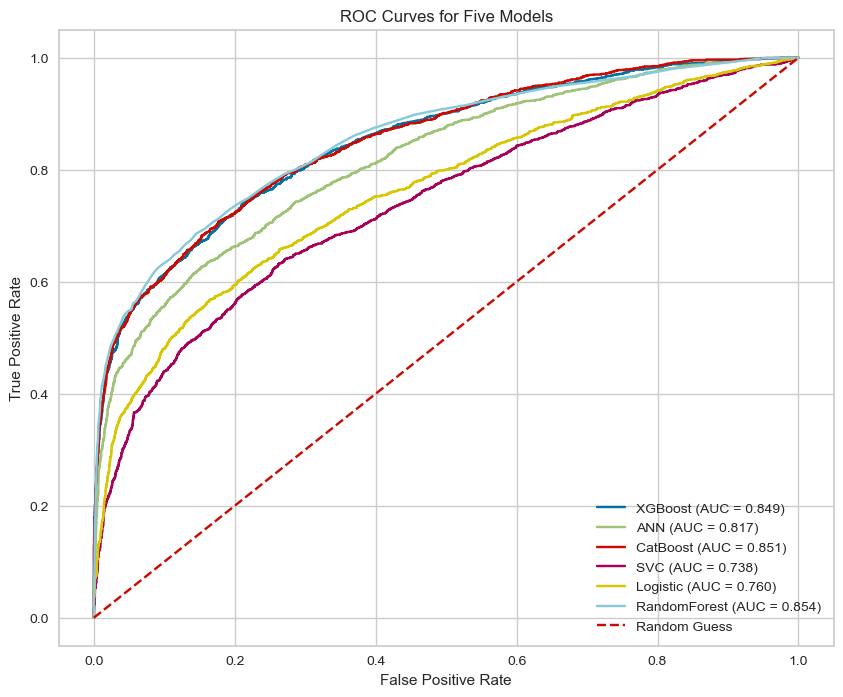

In [219]:
  
plt.figure(figsize=(10, 8))
 
for model in ['XGBoost','ANN','CatBoost','SVC','Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.3f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Five Models')
plt.legend()
plt.savefig('AUC.jpg')
plt.show()


In [231]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay



ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [229]:
plot_precision_recall_curve(ada, X_test, y_test, ax = plt.gca(),name = "AdaBoost")

plot_precision_recall_curve(ada_sm, X_test, y_test, ax = plt.gca(),name = "SMOTE")

plot_precision_recall_curve(ada_rus, X_test, y_test, ax = plt.gca(),name = "RUS")

plt.title('Precision-Recall curve')

NameError: name 'plot_precision_recall_curve' is not defined

============================ Optimiziation Model ================================

============================ RandomSearchCV =================================

============================== Let's Do it ======================================

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
from catboost import CatBoost

In [43]:
import time

In [97]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, f1_score
from sklearn import metrics

In [145]:
cat_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'lo

In [100]:
model_cat = CatBoostClassifier(loss_function='Logloss')

param_dist = {
    'depth': [3, 6, 9, 12],
    'iterations': [250, 100, 500, 1000,1500],
    'learning_rate': [0.01, 0.001, 0.01, 0.1],
}

scorer = make_scorer(f1_score, average='weighted')

random_search = RandomizedSearchCV(model_cat, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)

random_search.fit(x_train, y_train)

print("(CatBoost Model)Random Search - Best Hyperparameters:", random_search.best_params_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]



0:	learn: 0.6867192	total: 9.85ms	remaining: 4.92s
1:	learn: 0.6808320	total: 16.3ms	remaining: 4.06s
2:	learn: 0.6746534	total: 22.8ms	remaining: 3.78s
3:	learn: 0.6688854	total: 29.4ms	remaining: 3.64s
4:	learn: 0.6635702	total: 35.6ms	remaining: 3.53s
5:	learn: 0.6581791	total: 41.7ms	remaining: 3.43s
6:	learn: 0.6526490	total: 48.5ms	remaining: 3.42s
7:	learn: 0.6472887	total: 54.9ms	remaining: 3.37s
8:	learn: 0.6421649	total: 61.1ms	remaining: 3.33s
9:	learn: 0.6368894	total: 67.7ms	remaining: 3.31s
10:	learn: 0.6318667	total: 73.9ms	remaining: 3.29s
11:	learn: 0.6268943	total: 80.4ms	remaining: 3.27s
12:	learn: 0.6222511	total: 86.5ms	remaining: 3.24s
13:	learn: 0.6179028	total: 92.7ms	remaining: 3.22s
14:	learn: 0.6135203	total: 98.8ms	remaining: 3.19s
15:	learn: 0.6090275	total: 105ms	remaining: 3.18s
16:	learn: 0.6048908	total: 111ms	remaining: 3.16s
17:	learn: 0.6005175	total: 117ms	remaining: 3.14s
18:	learn: 0.5965947	total: 124ms	remaining: 3.13s
19:	learn: 0.5927437	total

170:	learn: 0.4168612	total: 1.05s	remaining: 2.02s
171:	learn: 0.4166181	total: 1.05s	remaining: 2.01s
172:	learn: 0.4164289	total: 1.06s	remaining: 2s
173:	learn: 0.4160938	total: 1.06s	remaining: 2s
174:	learn: 0.4158863	total: 1.07s	remaining: 1.99s
175:	learn: 0.4156124	total: 1.08s	remaining: 1.98s
176:	learn: 0.4153622	total: 1.08s	remaining: 1.98s
177:	learn: 0.4151394	total: 1.09s	remaining: 1.97s
178:	learn: 0.4149205	total: 1.09s	remaining: 1.96s
179:	learn: 0.4147449	total: 1.1s	remaining: 1.96s
180:	learn: 0.4145133	total: 1.11s	remaining: 1.95s
181:	learn: 0.4143179	total: 1.11s	remaining: 1.94s
182:	learn: 0.4140837	total: 1.12s	remaining: 1.94s
183:	learn: 0.4138897	total: 1.12s	remaining: 1.93s
184:	learn: 0.4136981	total: 1.13s	remaining: 1.92s
185:	learn: 0.4135084	total: 1.14s	remaining: 1.92s
186:	learn: 0.4133110	total: 1.14s	remaining: 1.91s
187:	learn: 0.4131537	total: 1.15s	remaining: 1.9s
188:	learn: 0.4129684	total: 1.15s	remaining: 1.9s
189:	learn: 0.4128050

338:	learn: 0.3966045	total: 2.1s	remaining: 999ms
339:	learn: 0.3964646	total: 2.11s	remaining: 992ms
340:	learn: 0.3964112	total: 2.11s	remaining: 986ms
341:	learn: 0.3963580	total: 2.12s	remaining: 980ms
342:	learn: 0.3962753	total: 2.13s	remaining: 973ms
343:	learn: 0.3962188	total: 2.13s	remaining: 967ms
344:	learn: 0.3961637	total: 2.14s	remaining: 960ms
345:	learn: 0.3960685	total: 2.14s	remaining: 954ms
346:	learn: 0.3959942	total: 2.15s	remaining: 948ms
347:	learn: 0.3959280	total: 2.15s	remaining: 941ms
348:	learn: 0.3958666	total: 2.16s	remaining: 935ms
349:	learn: 0.3958136	total: 2.17s	remaining: 929ms
350:	learn: 0.3957329	total: 2.17s	remaining: 922ms
351:	learn: 0.3956617	total: 2.18s	remaining: 916ms
352:	learn: 0.3955975	total: 2.18s	remaining: 910ms
353:	learn: 0.3955361	total: 2.19s	remaining: 903ms
354:	learn: 0.3954457	total: 2.19s	remaining: 897ms
355:	learn: 0.3953507	total: 2.2s	remaining: 891ms
356:	learn: 0.3952780	total: 2.21s	remaining: 884ms
357:	learn: 0.

In [101]:

random_search.best_params_

best_estimator_cat = random_search.best_estimator_

start_ts = time.time()

best_estimator_cat.fit(x_train, y_train)
y_pred_cat_best = best_estimator_cat.predict(x_test)

end_ts = time.time()

execution_time = end_ts - start_ts

print(f"The Accuracy of the CatBoost Model: {round(metrics.accuracy_score(y_pred_cat_best, y_test), 3)}")
print(f"Time to Learn [s]: {execution_time:.3f}")

0:	learn: 0.6867192	total: 7.43ms	remaining: 3.71s
1:	learn: 0.6808320	total: 14.3ms	remaining: 3.55s
2:	learn: 0.6746534	total: 20.9ms	remaining: 3.47s
3:	learn: 0.6688854	total: 28.1ms	remaining: 3.48s
4:	learn: 0.6635702	total: 35.1ms	remaining: 3.47s
5:	learn: 0.6581791	total: 42.1ms	remaining: 3.47s
6:	learn: 0.6526490	total: 48.8ms	remaining: 3.44s
7:	learn: 0.6472887	total: 56ms	remaining: 3.44s
8:	learn: 0.6421649	total: 62.8ms	remaining: 3.43s
9:	learn: 0.6368894	total: 69.9ms	remaining: 3.43s
10:	learn: 0.6318667	total: 77.2ms	remaining: 3.43s
11:	learn: 0.6268943	total: 83.9ms	remaining: 3.41s
12:	learn: 0.6222511	total: 91.2ms	remaining: 3.42s
13:	learn: 0.6179028	total: 98.2ms	remaining: 3.41s
14:	learn: 0.6135203	total: 105ms	remaining: 3.39s
15:	learn: 0.6090275	total: 111ms	remaining: 3.37s
16:	learn: 0.6048908	total: 118ms	remaining: 3.36s
17:	learn: 0.6005175	total: 125ms	remaining: 3.34s
18:	learn: 0.5965947	total: 131ms	remaining: 3.32s
19:	learn: 0.5927437	total: 1

169:	learn: 0.4170712	total: 1.23s	remaining: 2.38s
170:	learn: 0.4168612	total: 1.23s	remaining: 2.37s
171:	learn: 0.4166181	total: 1.24s	remaining: 2.36s
172:	learn: 0.4164289	total: 1.25s	remaining: 2.36s
173:	learn: 0.4160938	total: 1.25s	remaining: 2.35s
174:	learn: 0.4158863	total: 1.26s	remaining: 2.34s
175:	learn: 0.4156124	total: 1.26s	remaining: 2.33s
176:	learn: 0.4153622	total: 1.27s	remaining: 2.32s
177:	learn: 0.4151394	total: 1.28s	remaining: 2.31s
178:	learn: 0.4149205	total: 1.29s	remaining: 2.31s
179:	learn: 0.4147449	total: 1.29s	remaining: 2.3s
180:	learn: 0.4145133	total: 1.3s	remaining: 2.29s
181:	learn: 0.4143179	total: 1.31s	remaining: 2.28s
182:	learn: 0.4140837	total: 1.31s	remaining: 2.27s
183:	learn: 0.4138897	total: 1.32s	remaining: 2.27s
184:	learn: 0.4136981	total: 1.33s	remaining: 2.26s
185:	learn: 0.4135084	total: 1.33s	remaining: 2.25s
186:	learn: 0.4133110	total: 1.34s	remaining: 2.24s
187:	learn: 0.4131537	total: 1.35s	remaining: 2.23s
188:	learn: 0.

356:	learn: 0.3952780	total: 2.47s	remaining: 990ms
357:	learn: 0.3952323	total: 2.48s	remaining: 982ms
358:	learn: 0.3951597	total: 2.48s	remaining: 975ms
359:	learn: 0.3951122	total: 2.49s	remaining: 968ms
360:	learn: 0.3950391	total: 2.5s	remaining: 961ms
361:	learn: 0.3949650	total: 2.5s	remaining: 954ms
362:	learn: 0.3948689	total: 2.51s	remaining: 946ms
363:	learn: 0.3948016	total: 2.51s	remaining: 939ms
364:	learn: 0.3947399	total: 2.52s	remaining: 932ms
365:	learn: 0.3946533	total: 2.53s	remaining: 925ms
366:	learn: 0.3945761	total: 2.53s	remaining: 918ms
367:	learn: 0.3945276	total: 2.54s	remaining: 911ms
368:	learn: 0.3944584	total: 2.54s	remaining: 903ms
369:	learn: 0.3943972	total: 2.55s	remaining: 896ms
370:	learn: 0.3943256	total: 2.56s	remaining: 889ms
371:	learn: 0.3942668	total: 2.56s	remaining: 882ms
372:	learn: 0.3942093	total: 2.57s	remaining: 875ms
373:	learn: 0.3941423	total: 2.57s	remaining: 867ms
374:	learn: 0.3940854	total: 2.58s	remaining: 860ms
375:	learn: 0.

In [104]:
print("Evaluation Metrics for Catboost Model:\n",classification_report(y_test, y_pred_cat_best))

Evaluation Metrics for Catboost Model:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      5871
           1       0.80      0.42      0.55      1733

    accuracy                           0.84      7604
   macro avg       0.83      0.69      0.73      7604
weighted avg       0.84      0.84      0.82      7604



===========================================================

============================== XGBoost ============================

In [102]:
xgboosting = XGBClassifier(random_state=42)


params_xgb = {
    "learning_rate": [0.001, 0.01, 0.1, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}



In [106]:
rs_model=RandomizedSearchCV(xgboosting,param_distributions=params_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(x_train, y_train)
print("(CatBoost Model)Random Search - Best Hyperparameters:", rs_model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan]



(CatBoost Model)Random Search - Best Hyperparameters: {'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.5}


In [107]:
start_ts = time.time()

# Fit the best estimator on the training data
best_estimator_xgb.fit(x_train, y_train)

end_ts = time.time()

execution_time = end_ts - start_ts

# Make predictions on the test data
pred = best_estimator_xgb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)

print("The Accuracy of the XGBoost Model: ", round(accuracy, 3))
print(f"Prediction Time [s]: {execution_time:.5f}")

The Accuracy of the XGBoost Model:  0.865
Prediction Time [s]: 1.55641


In [105]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time
import sklearn.metrics as metrics

# Define the parameter grid for the randomized search
param_grid = {
    'n_estimators': [100, 200, 300],
     "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

# Create a base XGBoost classifier
clf = XGBClassifier()

# Create the RandomizedSearchCV object
rs_model = RandomizedSearchCV(clf, param_grid, cv=3, n_iter=10, random_state=42)

# Fit the randomized search to the data
rs_model.fit(x_train, y_train)

# Access the best estimator
best_estimator_xgb = rs_model.best_estimator_

start_ts = time.time()

# Fit the best estimator on the training data
best_estimator_xgb.fit(x_train, y_train)

end_ts = time.time()

execution_time = end_ts - start_ts

# Make predictions on the test data
pred = best_estimator_xgb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)

print("The Accuracy of the XGBoost Model: ", round(accuracy, 3))
print(f"Prediction Time [s]: {execution_time:.5f}")

The Accuracy of the XGBoost Model:  0.865
Prediction Time [s]: 1.73790


In [108]:
print("Evaluation Metrics for Catboost Model:\n",classification_report(y_test, pred))

Evaluation Metrics for Catboost Model:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      5911
           1       0.83      0.51      0.64      1752

    accuracy                           0.87      7663
   macro avg       0.85      0.74      0.78      7663
weighted avg       0.86      0.87      0.85      7663



======================== Logistic Regression ========================

In [112]:
# RandomizedSearchCV hyperparameter tuning
model_log = LogisticRegression(random_state=42)

param_dist_log = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [200, 500, 1000]
}

scorer = make_scorer(f1_score, average='weighted')

random_search_log = RandomizedSearchCV(model_log, param_distributions=param_dist_log, cv=3, scoring=scorer, n_jobs=4, random_state=42)

random_search_log.fit(x_train, y_train)

print("(Logistic Regression Model)Random Search - Best Hyperparameters:", random_search_log.best_params_)



(Logistic Regression Model)Random Search - Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'C': 3792.690190732246}


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _chec

In [113]:
from sklearn import metrics

start_ts = time.time()

random_estimator.best_params_

best_estimator = random_estimator.best_estimator_

best_estimator.fit(x_train, y_train)

end_ts = time.time()

execution_time = end_ts - start_ts

pred = best_estimator.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)

print("The Accuracy of the Logistic Regression Model: ", round(accuracy, 3))
print(f"Prediction Time [s]: {execution_time:.5f}")

The Accuracy of the Logistic Regression Model:  0.824
Prediction Time [s]: 0.01539


============================= SVC Hyperparameter Tuning ===========================

In [95]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [51]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import sklearn
import numpy
import scipy

print("scikit-learn version:", sklearn.__version__)
print("numpy version:", numpy.__version__)
print("scipy version:", scipy.__version__)

scikit-learn version: 1.4.2
numpy version: 1.24.3
scipy version: 1.11.1


In [51]:
pip uninstall scikit-learn
pip install scikit-learn

SyntaxError: invalid syntax (2549202002.py, line 1)

SyntaxError: invalid syntax (2549202002.py, line 1)

In [107]:


param_dist = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


f1_scorer = make_scorer(f1_score, average='weighted')
svm_clf = SVC()

rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_dist,
                                n_iter=10, cv=3, scoring=f1_scorer, random_state=42)

# fit the randomized search object to the data
rnd_search.fit(x_train, y_train) 

print("(SVC Model)Random Search - Best Hyperparameters:", rnd_search.best_params_)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^
AttributeError: '_Scorer' object has no attribute '_score'

  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^
AttributeError: '_Scorer' object has no attribute '_score'

  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^
AttributeError: '_Scorer' object has no attribute '_score'

  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last

(SVC Model)Random Search - Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}


In [109]:
from sklearn import metrics

start_ts = time.time()

rnd_search.best_params_

best_estimator_svc = rnd_search.best_estimator_

best_estimator_svc.fit(x_train, y_train)

end_ts = time.time()

execution_time = end_ts - start_ts

pred = best_estimator_svc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)

print("The Accuracy of the SVC Model: ", round(accuracy, 3))
print(f"Prediction Time [s]: {execution_time:.5f}")

The Accuracy of the SVC Model:  0.824
Prediction Time [s]: 9.15939


==================== Random Forest =======================

In [101]:
rf_Model = RandomForestClassifier()

In [102]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [104]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train, y_train)
print("(RF Model)Random Search - Best Hyperparameters:", rf_RandomGrid.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\skle

(RF Model)Random Search - Best Hyperparameters: {'n_estimators': 72, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}


In [106]:
start_ts = time.time()

rf_RandomGrid.best_params_

best_estimator_rf = rf_RandomGrid.best_estimator_

best_estimator_rf.fit(x_train, y_train)

end_ts = time.time()

execution_time = end_ts - start_ts

pred = best_estimator_rf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)

print("The Accuracy of the RF Model: ", round(accuracy, 3))
print(f"Prediction Time [s]: {execution_time:.5f}")

The Accuracy of the RF Model:  0.839
Prediction Time [s]: 1.01600
